## decoding an 8x8 Block by DCT

In [1]:
#necessary packages:
from scipy.fftpack import dct
import numpy as np 
from matplotlib import pyplot

def apply_on_matrix_entries(function, matrix):
    """
    apply a fct on all entries of a matrix
    """
    return [ [function(val) for val in l] for l in matrix]

### we want to decode the an 8x8 pixel block with the following greyscale values

In [2]:
grey_values = np.array([
     [52, 55, 61, 66, 70, 61, 64, 73],
     [63, 59, 55, 90, 109, 85, 69, 72],
     [62, 59, 68, 113, 144, 104, 66, 73],
     [63, 58, 71, 122, 154, 106, 70, 69],
     [67, 61, 68, 104, 126, 88, 68, 70],
     [79, 65, 60, 70, 77, 68, 58, 75],
     [85, 71, 64, 59, 55, 61, 65, 83],
     [87, 79, 69, 68, 65, 76, 78, 94]])

### plot the image

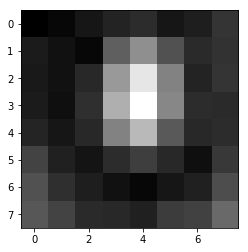

In [3]:
im = pyplot.imshow(X = grey_values, cmap='gray')

### shift the greyscale from [0, 255] to [-128, 127]

In [69]:
shifted_greyscale = apply_on_matrix_entries(lambda x: x-128, b)
shifted_greyscale = np.array(shifted_greyscale)
shifted_greyscale

array([[-76, -73, -67, -62, -58, -67, -64, -55],
       [-65, -69, -73, -38, -19, -43, -59, -56],
       [-66, -69, -60, -15,  16, -24, -62, -55],
       [-65, -70, -57,  -6,  26, -22, -58, -59],
       [-61, -67, -60, -24,  -2, -40, -60, -58],
       [-49, -63, -68, -58, -51, -60, -70, -53],
       [-43, -57, -64, -69, -73, -67, -63, -45],
       [-41, -49, -59, -60, -63, -52, -50, -34]])

### 2-dim dicrete cosine transformation (DCT)

In [81]:
#2-dim dct
G = dct(x=dct(x=shifted_greyscale.T, type=2).T, type= 2)
#different standartization
G = apply_on_matrix_entries(lambda x: x/(8*2*sqrt(2)), G)
for i in range(len(G)):
    G[i][i] = G[i][i] / sqrt(2)
apply_on_matrix_entries(lambda x: round(x,1), G)

[[-415.4, -30.2, -61.2, 27.2, 56.1, -20.1, -2.4, 0.5],
 [4.5, -10.9, -43.0, 7.3, 9.3, -5.0, -6.0, 3.4],
 [-46.8, 5.2, 38.6, -17.4, -20.4, 7.0, 3.8, -4.0],
 [-48.5, 8.5, 24.1, -7.4, -7.2, 4.5, 1.3, 1.4],
 [12.1, -4.6, -9.3, -2.8, -0.9, 1.2, -2.0, 2.2],
 [-7.7, 2.1, 1.7, -4.2, -1.7, 0.5, 3.0, 1.3],
 [-1.0, 0.1, 0.3, -1.7, -0.6, -2.1, 2.1, -0.5],
 [-0.2, 0.1, -0.8, -3.0, -0.8, -0.1, 0.4, 0.8]]

### quantization

In [82]:
# quantization matrix
Q = [
    [ 16, 11, 10, 16, 24, 40, 51, 61],
    [ 12, 12, 14 ,19, 26, 58, 60, 55],
    [ 14, 13, 16, 24, 40, 57, 69, 56],
    [ 14, 17, 22, 29, 51, 87, 80, 62],
    [ 18, 22, 37, 56, 68,109,103, 77],
    [ 24, 35, 55, 64, 81,104,113, 92],
    [ 49, 64, 78, 87,103,121,120,101],
    [ 72, 92, 95, 98,112,100,103, 99]]

# devide every enty of G by the corresponding entry of Q
for i in range(8):
    for k in range(8):
        G[i][k] = G[i][k]/Q[i][k]
G = apply_on_matrix_entries(lambda x: round(x), G)
G = apply_on_matrix_entries(lambda x: int(x), G)
G

[[-26, -3, -6, 2, 2, -1, 0, 0],
 [0, -1, -3, 0, 0, 0, 0, 0],
 [-3, 0, 2, -1, -1, 0, 0, 0],
 [-3, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

#### Since most non zero values are now in the upper left triangle, one can decode this matrix efficiently